<a href="https://colab.research.google.com/github/laresamdeola/Computer-Vision/blob/main/ANN_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 883884.94it/s] 


Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 61849.24it/s]


Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1046295.74it/s]


Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3853262.29it/s]

Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [6]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
image,label = train_data[0]

In [12]:
image.shape

torch.Size([1, 28, 28])

In [13]:
label

5

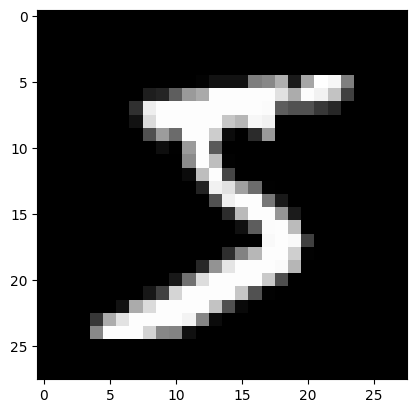

In [14]:
plt.imshow(image.reshape((28,28)), cmap='gray')

In [15]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [16]:
from torchvision.utils import make_grid

In [17]:
for images, labels in train_loader:
  break

In [18]:
images.shape

torch.Size([100, 1, 28, 28])

Labels: , [7 2 3 5 8 5 3 6 9 9 1 3]


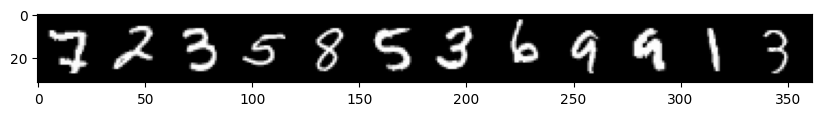

In [19]:
print(f'Labels: , {labels[:12].numpy()}')

# Print the first 12 images
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10,4))
# transpose the images from (Color Channel, Width, Height) to (Width, Height, Color Channel)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [20]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
    super().__init__()
    self.fc1 = nn.Linear(in_sz,layers[0])
    self.fc2 = nn.Linear(layers[0], layers[1])
    self.fc3 = nn.Linear(layers[1], out_sz)

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [21]:
torch.manual_seed(101)
model = MultiLayerPerceptron()
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [24]:
images.shape # change to [100, 784]

torch.Size([100, 1, 28, 28])

In [25]:
images.view(100,-1).shape

torch.Size([100, 784])

In [26]:
import time

start_time = time.time()

# Training

epochs = 10

# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train.view(100,-1))
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%200 == 0:
      acc = trn_corr.item()*100/(100*b)
      print(f'Epoch {i} batch{b} loss:{loss.item()} accuracy:{acc:7.3f}%')

  train_losses.append(loss.item())
  train_correct.append(trn_corr.item())

  with torch.no_grad():

    for b, (X_test, y_test) in enumerate(test_loader):

      y_val = model(X_test.view(500, -1))

      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted==y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

end_time = time.time()
print(f'Duration: {(end_time-start_time)/60} mins')

Epoch 0 batch200 loss:0.23541299998760223 accuracy: 83.250%
Epoch 0 batch400 loss:0.3537280559539795 accuracy: 87.528%
Epoch 0 batch600 loss:0.13651520013809204 accuracy: 89.573%
Epoch 1 batch200 loss:0.24385470151901245 accuracy: 94.825%
Epoch 1 batch400 loss:0.14487527310848236 accuracy: 95.060%
Epoch 1 batch600 loss:0.07246916741132736 accuracy: 95.360%
Epoch 2 batch200 loss:0.08382391184568405 accuracy: 96.520%
Epoch 2 batch400 loss:0.06502086669206619 accuracy: 96.625%
Epoch 2 batch600 loss:0.06827977299690247 accuracy: 96.717%
Epoch 3 batch200 loss:0.12022455036640167 accuracy: 97.635%
Epoch 3 batch400 loss:0.058163758367300034 accuracy: 97.500%
Epoch 3 batch600 loss:0.03137049823999405 accuracy: 97.500%
Epoch 4 batch200 loss:0.11588415503501892 accuracy: 98.155%
Epoch 4 batch400 loss:0.0415460504591465 accuracy: 98.005%
Epoch 4 batch600 loss:0.048713117837905884 accuracy: 98.022%
Epoch 5 batch200 loss:0.009237682446837425 accuracy: 98.350%
Epoch 5 batch400 loss:0.037062946707010

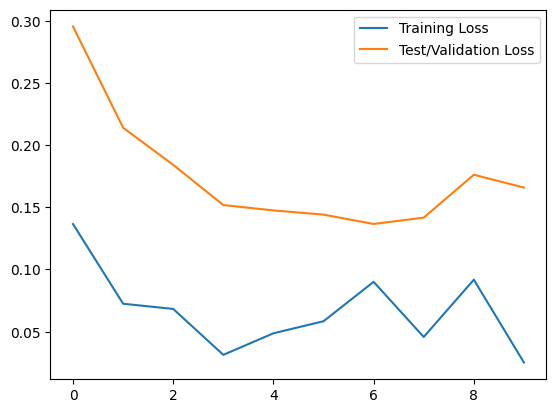

In [27]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test/Validation Loss')
plt.legend()
plt.show()

In [36]:
train_acc = [t/600 for t in train_correct]

In [37]:
test_acc = [t/100 for t in test_correct]

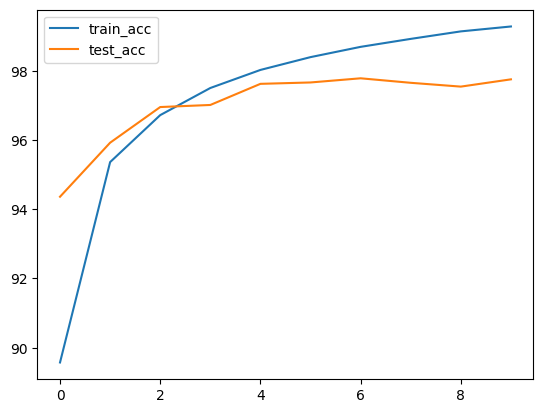

In [42]:
plt.plot(train_acc, label='train_acc')
plt.plot(test_acc, label='test_acc')
plt.legend()
plt.show()

In [40]:
print(f'Training Accuracy: {train_acc[-1]}')

Training Accuracy: 99.27666666666667


In [41]:
print(f'Validation Accuracy: {test_acc[-1]}')

Validation Accuracy: 97.75


New Unseen Data

In [44]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
  correct=0

  for X_test, y_test in test_load_all:
    y_val = model(X_test.view(len(X_test), -1))
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [47]:
correct.item()/len(test_data)*100

97.75

Confusion Matrix

In [48]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 972,    0,    4,    0,    1,    2,    5,    2,    3,    2],
       [   0, 1124,    3,    0,    0,    0,    3,    8,    0,    2],
       [   1,    3, 1002,    2,    1,    0,    2,   11,    4,    0],
       [   2,    2,    7,  990,    0,    8,    1,    4,    2,    2],
       [   1,    0,    2,    0,  962,    3,    1,    2,    3,   11],
       [   0,    0,    0,    7,    0,  866,    3,    0,    2,    3],
       [   1,    1,    1,    0,    6,    2,  941,    0,    1,    0],
       [   0,    0,    2,    3,    1,    1,    0,  981,    2,    0],
       [   3,    5,   11,    4,    1,    9,    2,    3,  952,    4],
       [   0,    0,    0,    4,   10,    1,    0,   17,    5,  985]])